In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers

In [2]:
classifier = Sequential()

In [3]:
classifier.add(Convolution2D(32, 3,  3, input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [5]:
classifier.add(Convolution2D(32, 3,  3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(26, activation = 'softmax'))

In [9]:
classifier.compile(
              optimizer = optimizers.SGD(lr = 0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(
        'mydata/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 45500 images belonging to 26 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
        'mydata/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 6500 images belonging to 26 classes.


In [14]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=800,
        epochs=25,
        validation_data = test_set,
        validation_steps = 6500
      )

C:\Users\Futuremind\AppData\Local\Temp\ipykernel_10008\3303931081.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = classifier.fit_generator(


Epoch 1/25
800/800 [==============================] - 568s 703ms/step - loss: 3.2392 - accuracy: 0.0546 - val_loss: 3.2197 - val_accuracy: 0.0651
Epoch 2/25
800/800 [==============================] - 199s 248ms/step - loss: 3.1278 - accuracy: 0.0906
Epoch 3/25
800/800 [==============================] - 133s 166ms/step - loss: 2.8421 - accuracy: 0.1563
Epoch 4/25
800/800 [==============================] - 101s 126ms/step - loss: 2.4512 - accuracy: 0.2539
Epoch 5/25
800/800 [==============================] - 91s 114ms/step - loss: 2.1358 - accuracy: 0.3227
Epoch 6/25
800/800 [==============================] - 89s 111ms/step - loss: 1.9459 - accuracy: 0.3745
Epoch 7/25
800/800 [==============================] - 84s 105ms/step - loss: 1.7974 - accuracy: 0.4182
Epoch 8/25
800/800 [==============================] - 84s 105ms/step - loss: 1.6957 - accuracy: 0.4474
Epoch 9/25
800/800 [==============================] - 84s 105ms/step - loss: 1.6163 - accuracy: 0.4643
Epoch 10/25
800/800 [======

In [16]:
'''#Saving the model
import h5py
classifier.save('Trained_model.h5')'''

"#Saving the model\nimport h5py\nclassifier.save('Trained_model.h5')"

In [17]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
import matplotlib.pyplot as plt

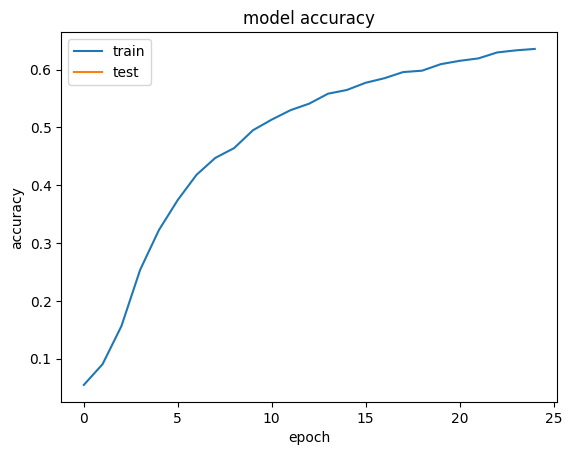

In [22]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

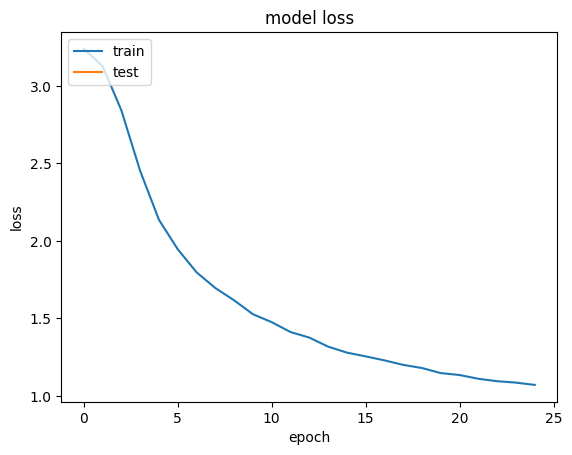

In [21]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
import h5py
classifier.save('Trained_model.h5')